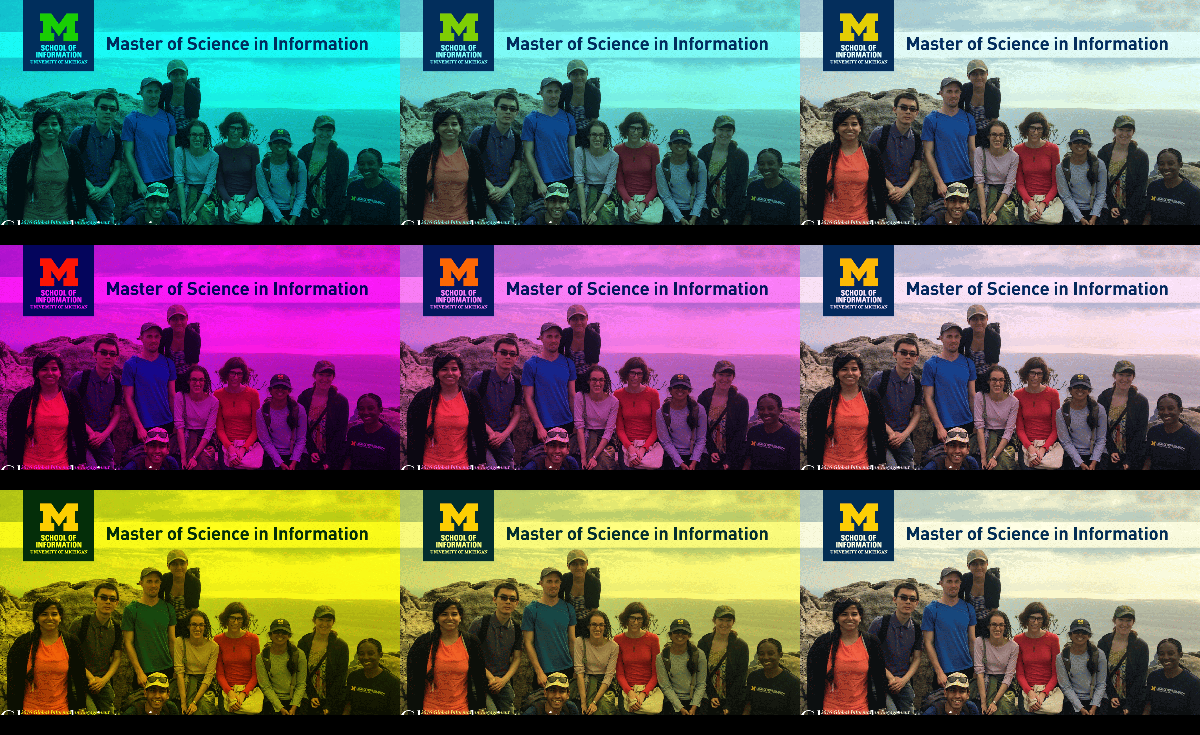

In [2]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw,ImageFont

# read image and convert to RGB
image=Image.open("msi_recruitment.gif")
image=image.convert('RGB')
#print(image.getpixel((0,0)))
# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
or_image=image
dic=['Channel 0','Channel 1','Channel 2']
chng=[0.1,0.5,0.9]
for item in dic:
    for num in chng:
        image=or_image.copy()
        for j in range(image.width):
            for k in range(image.height):
                r,g,b=image.getpixel((j,k))
                if item=='Channel 0':
                    r=round(r*num)
                elif item=='Channel 1':
                    g=round(g*num)
                else:
                    b=round(b*num)
                image.putpixel((j,k),(r,g,b))
        #image.height=image.height+40        
        drawing_object=ImageDraw.Draw(image)

        # use a truetype font
        font = ImageFont.truetype("fanwood-webfont.ttf", 45)

        drawing_object.text((0,430), '{} intensity {}'.format(item,str(num)), font=font)
        images.append(image)
                
# a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,(first_image.height+40)*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height+40
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)